# this notebook saves motion energy from predefined rectangles and saves them for each session

no behavior videos for 030424
100.0% of files exported, exporting motion energy of /home/jupyter/bucket/Data/Behavior_videos/MotionEnergy_manual_ROI/Bergamo-2P-Photostim/side/bci69/2024-03-03_12-57-54


/tmp/ipykernel_10393/2051803371.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  scanimage_file_names = np.asarray(scanimage_file_names_)


BCI_69_030324_side_motion_energy.npy done
36.1% of files exported, exporting motion energy of /home/jupyter/bucket/Data/Behavior_videos/MotionEnergy_manual_ROI/Bergamo-2P-Photostim/side/bcinm008/2024-03-01_13-08-36


/tmp/ipykernel_10393/2051803371.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  scanimage_file_names = np.asarray(scanimage_file_names_)


BCI_69_030124_side_motion_energy.npy done
0.0% of files exported, exporting motion energy of /home/jupyter/bucket/Data/Behavior_videos/MotionEnergy_manual_ROI/Bergamo-2P-Photostim/side/bcinm008/2024-02-29_13-52-05


/tmp/ipykernel_10393/2051803371.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  scanimage_file_names = np.asarray(scanimage_file_names_)


BCI_69_022924_side_motion_energy.npy done
0.0% of files exported, exporting motion energy of /home/jupyter/bucket/Data/Behavior_videos/MotionEnergy_manual_ROI/Bergamo-2P-Photostim/side/bci69/2024-02-28_15-55-58
BCI_69_022824_side_motion_energy.npy done


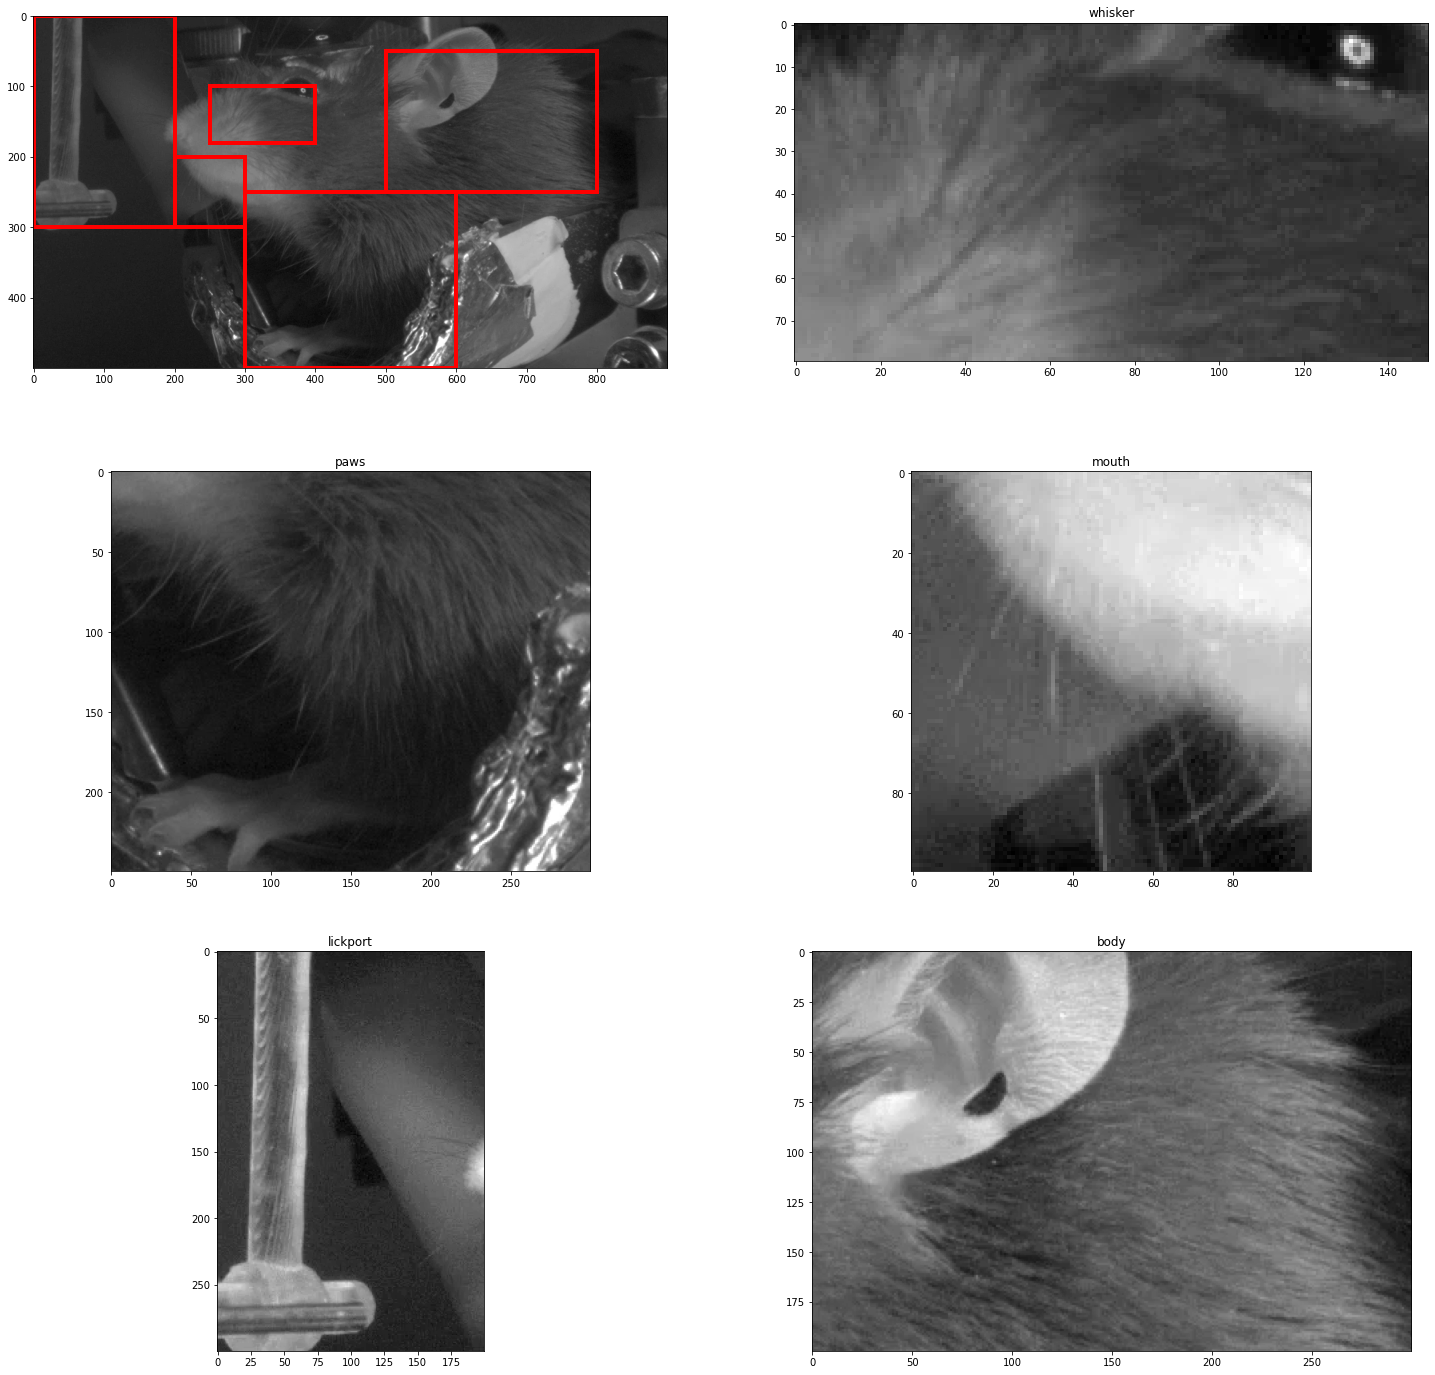

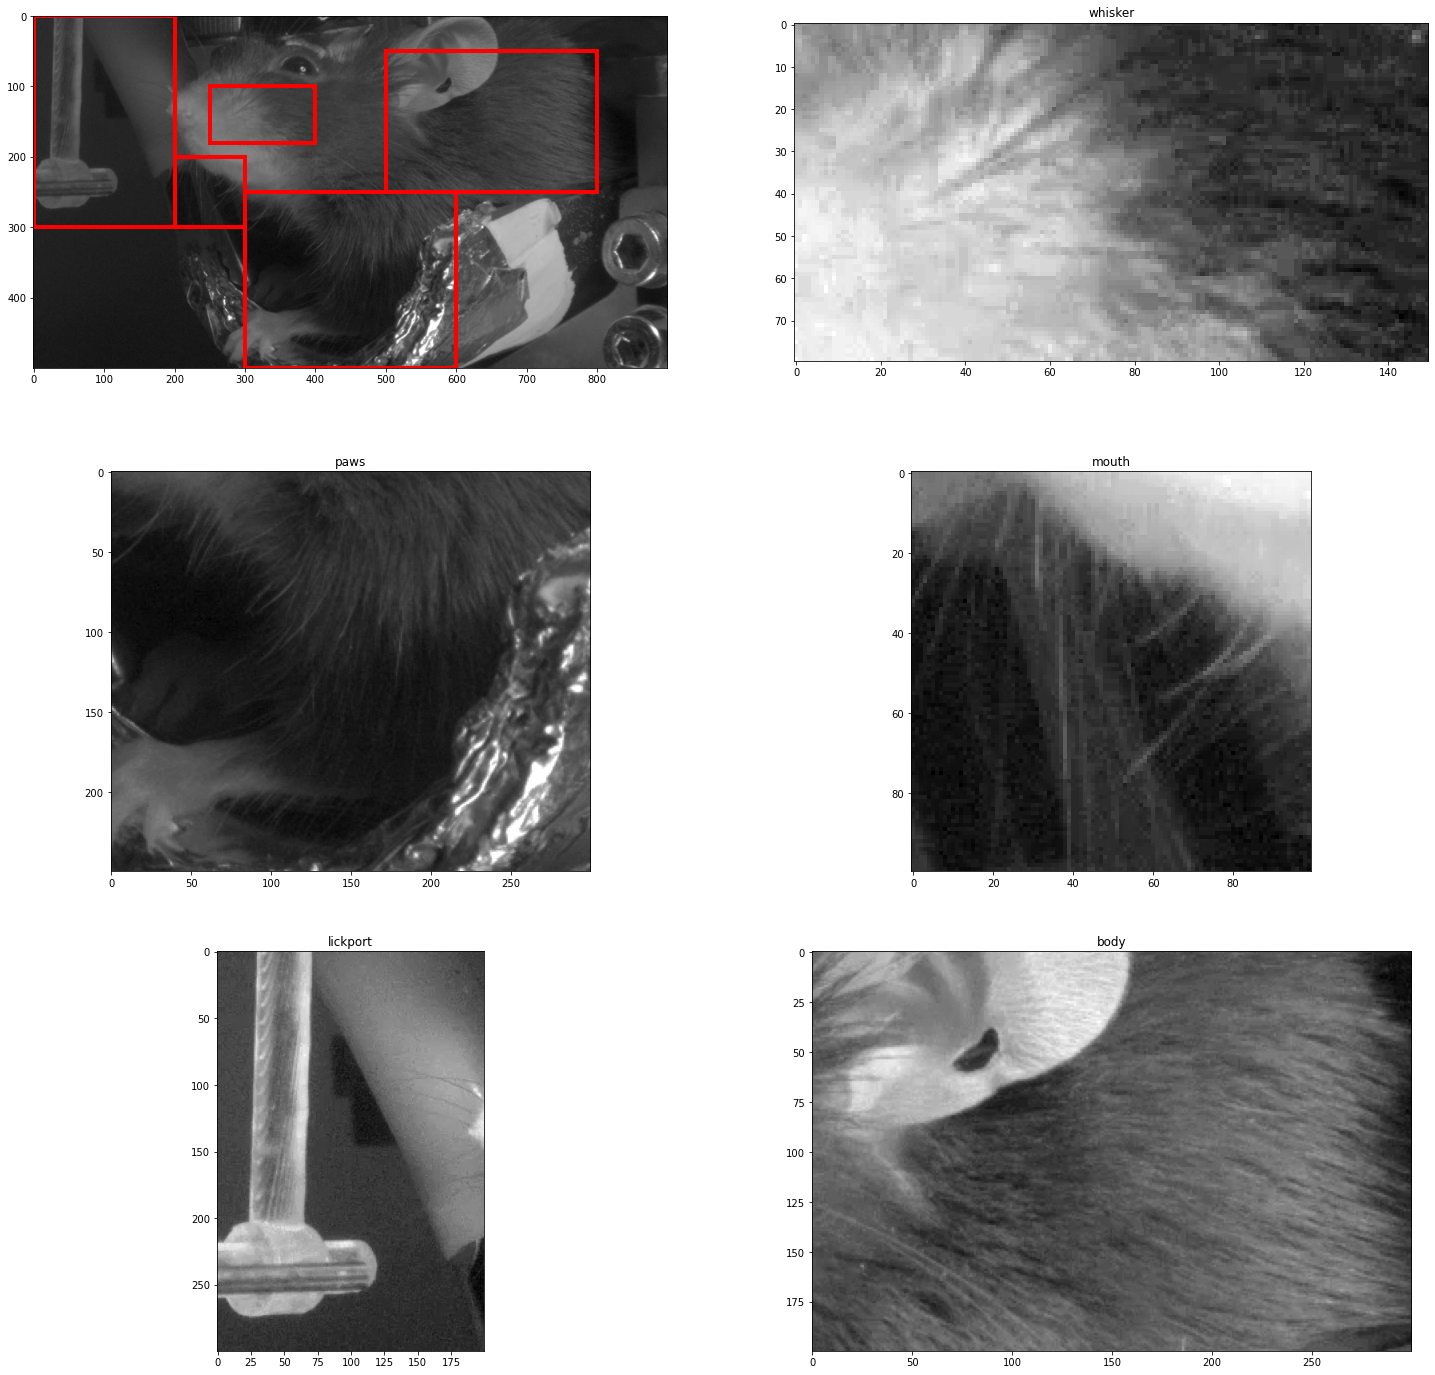

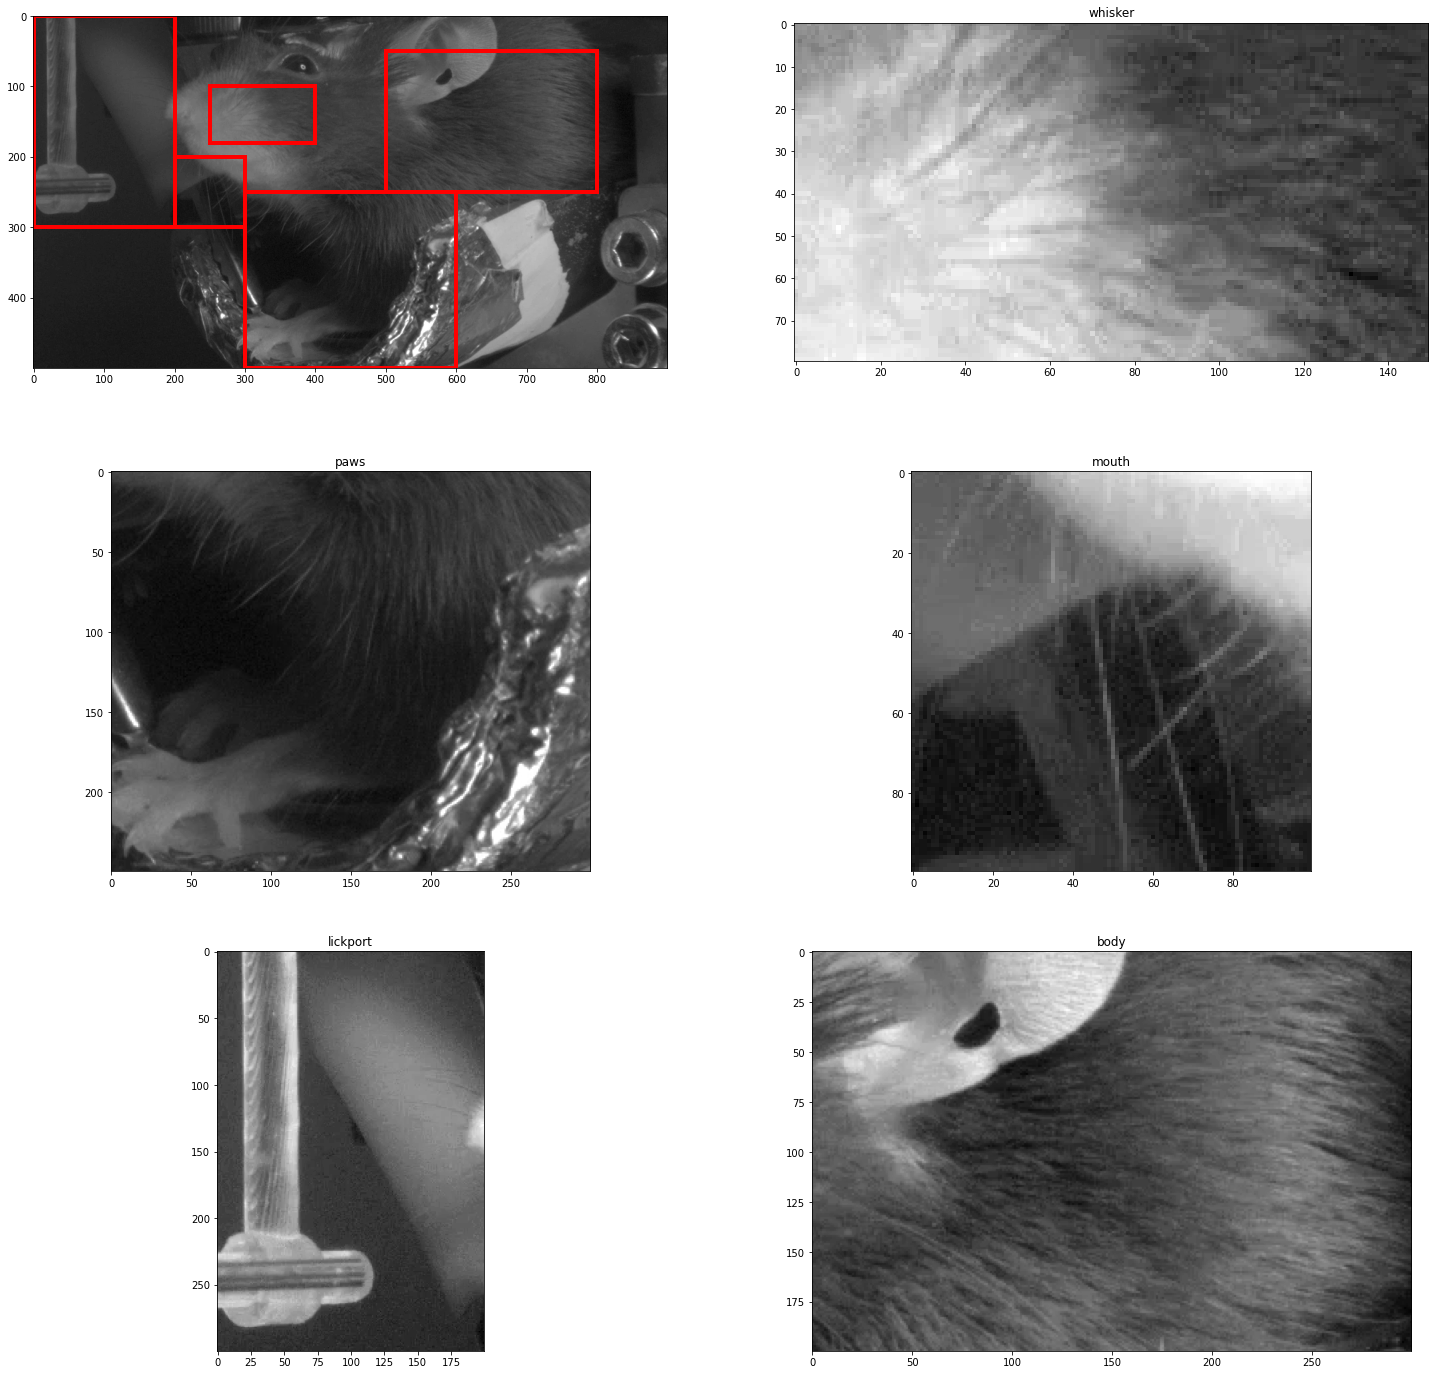

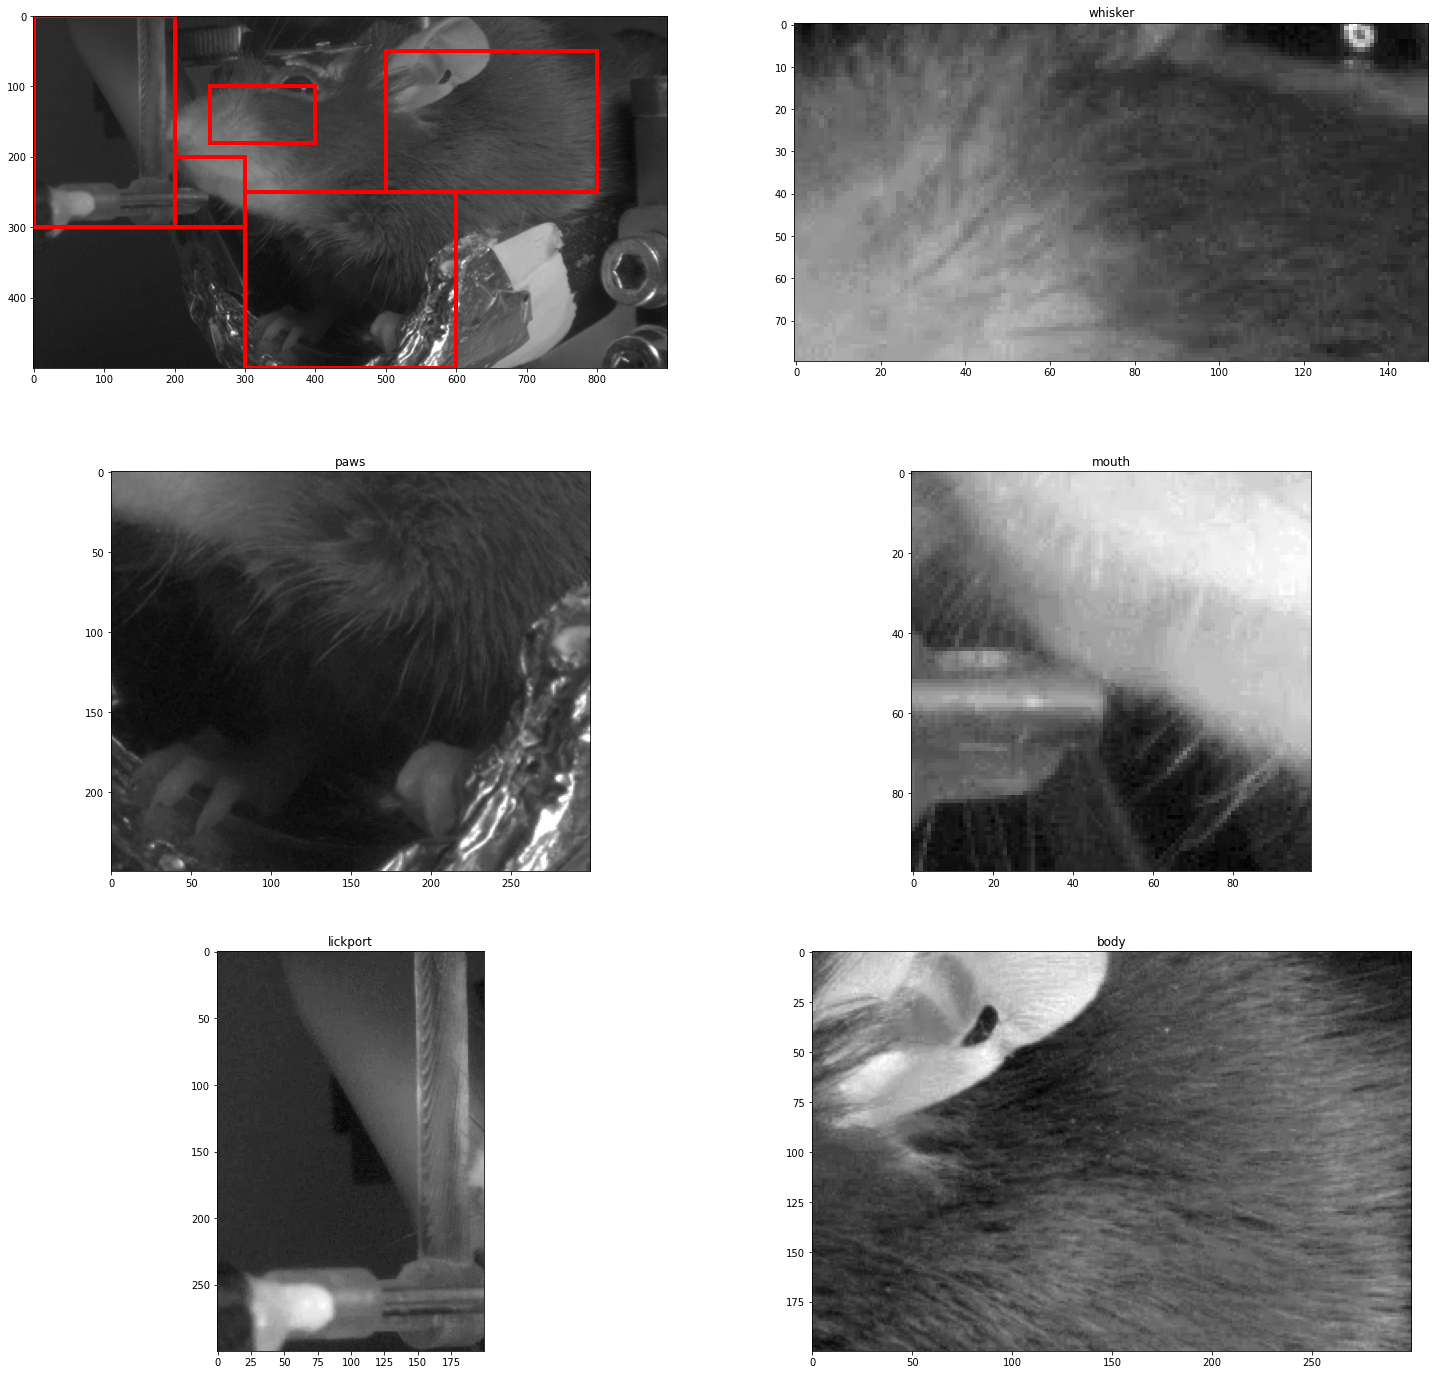

In [1]:
# identify sessions that are useful
# extract motion energy from face and body and tongue
# save motion energy next to 
import os
import numpy as np
import json
import pandas as pd
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle





# def extract_motion_energy_from_session(bpod_path,
#                                       dlc_base_dir,
#                                       raw_video_path,
#                                       motion_energy_base_dir,
#                                       imaging_aligned_motion_energy_base_dir,
#                                       mouse,
#                                       session,
#                                       edge_values_dict,
#                                       overwrite):
    




    
    
mouse = "BCI_69"
session = "022924"
overwrite = True
camera = "side"


bpod_path = os.path.abspath("/home/jupyter/bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
dlc_base_dir = os.path.abspath("/home/jupyter/bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
raw_video_path = os.path.abspath("/home/jupyter/bucket/Data/Behavior_videos/raw/Bergamo-2P-Photostim/")
motion_energy_base_dir = os.path.abspath("/home/jupyter/bucket/Data/Behavior_videos/MotionEnergy_manual_ROI/Bergamo-2P-Photostim/")
imaging_aligned_motion_energy_base_dir = os.path.abspath("/home/jupyter/bucket/Data/Behavior_videos/MotionEnergy_manual_ROI_imaging_aligned/")


edge_values_dict = {'whisker':{'x':[250,400],
                              'y':[100,180]},
                   'paws':{'x':[300,600],
                           'y':[250,500]},
                   'mouth':{'x':[200,300],
                           'y':[200,300]},
                   'lickport':{'x':[0,200],
                               'y':[0,300]},
                   'body':{'x':[500,800],
                           'y':[50,250]}}
for session in ['030424','030324','030124','022924','022824']:
    # extract_motion_energy_from_session(bpod_path,
    #                                   dlc_base_dir,
    #                                   raw_video_path,
    #                                   motion_energy_base_dir,
    #                                   imaging_aligned_motion_energy_base_dir,
    #                                   mouse,
    #                                   session,
    #                                   edge_values_dict,
    #                                   overwrite)
    bpod_filepath = os.path.join(bpod_path, mouse, session+"-bpod_zaber.npy")
    bpod_data = np.load(bpod_filepath, allow_pickle=True).tolist()
    behavior_movie_names_ = bpod_data['behavior_movie_name_list']
    scanimage_file_names_ = bpod_data['scanimage_file_names']
    behavior_movie_names = []
    scanimage_file_names = []
    for bmn,sfn in zip(behavior_movie_names_,scanimage_file_names_):
        if not type(bmn)==np.str_:
            behavior_movie_names.append(bmn)
            scanimage_file_names.append(sfn)
    if len(behavior_movie_names) == 0:
        print('no behavior videos for {}'.format(session))
        continue # should be return in function
    # load all dlc files and extract median part pixels
    file_exist_list = []
    behavior_movie_names_ = []
    scanimage_file_names_ = []
    for bmn,sfn in zip(behavior_movie_names,scanimage_file_names): # read in all dlc files to calculate location of ROIs
        for bmn_now in bmn:
            if camera not in bmn_now:
                continue
            bmn = bmn_now
            residual_path = bmn[bmn.find(camera):].strip("'")
            save_dir = os.path.join(*np.concatenate([[motion_energy_base_dir],residual_path.split('/')[:-1]]))
            Path(save_dir).mkdir(parents=True, exist_ok=True)
            behavior_movie_names_.append(bmn)
            scanimage_file_names_.append(sfn)
            residual_path = bmn[bmn.find(camera):].strip("'")
            if os.path.exists(os.path.join(save_dir,residual_path.split('/')[-1][:-3]+'npy')):
                file_exist_list.append(True)
            else:
                file_exist_list.append(False)
    if len(file_exist_list)>0 and (sum(file_exist_list) == len(file_exist_list)) and not overwrite:
        print('all files already exist, skipping motion energy export')
       # return None
    else:
        if len(file_exist_list)>0:
            print('{}% of files exported, exporting motion energy of {}'.format(100*np.round(sum(file_exist_list)/len(file_exist_list),3),save_dir))
        else:
            print(', exporting motion energy of {}'.format(save_dir))


    behavior_movie_names = np.asarray(behavior_movie_names_)
    scanimage_file_names = np.asarray(scanimage_file_names_)



    image_done = False
    out_dict_list = []
    for sfn,bmn in zip(scanimage_file_names,behavior_movie_names):
        cutouts = {}
        for roi in edge_values_dict.keys():
            cutouts[roi] = []
        residual_path = bmn[bmn.find(camera):].strip("'")
        video_path = os.path.join(raw_video_path,residual_path)
        cap = cv2.VideoCapture(video_path)
        pd_json = pd.read_json(video_path[:-3]+'json')
        while(cap.isOpened()):

            ret, frame = cap.read()

            if ret == True:
                for i, roi in enumerate(edge_values_dict.keys()):
                    cutout = frame[edge_values_dict[roi]['y'][0]:edge_values_dict[roi]['y'][1],
                                   edge_values_dict[roi]['x'][0]:edge_values_dict[roi]['x'][1],
                                   0]
                    cutouts[roi].append(cutout)
                    last_frame = frame
            else: 
                break

            if not image_done:

                fig = plt.figure(figsize = [25,25])
                ax1 = fig.add_subplot(3,2,1)

                ax1.imshow(frame[:,:,0],cmap = 'gray')
                for i, roi in enumerate(edge_values_dict.keys()):
                    ax1.add_patch(Rectangle((edge_values_dict[roi]['x'][0],edge_values_dict[roi]['y'][0]),np.diff(edge_values_dict[roi]['x'])[0],np.diff(edge_values_dict[roi]['y'])[0],
                                    edgecolor='red',
                                    facecolor='none',
                                    lw=4))
                    cutout = frame[edge_values_dict[roi]['y'][0]:edge_values_dict[roi]['y'][1],
                                   edge_values_dict[roi]['x'][0]:edge_values_dict[roi]['x'][1],
                                   0]
                    ax2 = fig.add_subplot(3,2,2+i)
                    ax2.imshow(cutout,cmap = 'gray')
                    ax2.set_title(roi)
                image_done = True
                fig.savefig(os.path.join(save_dir,residual_path.split('/')[-1][:-3]+'jpg'))
        # When everything done, release the video capture object
        cap.release()
        out_dict = {'scanimage_file_name':sfn,
                    'face_video_name':bmn,
                    'motion_energy_traces':{},
                    'edge_values':edge_values_dict,
                    'frame_times':pd_json['frame_times'].values,
                    'last_frame':last_frame,
                   }
        out_dict_list.append(out_dict)
        for i, roi in enumerate(edge_values_dict.keys()):
            out_dict['motion_energy_traces'][roi] = np.mean(np.abs(np.diff(np.asarray(cutouts[roi],float),axis=0)),(1,2))

        np.save(os.path.join(save_dir,residual_path.split('/')[-1][:-3]+'npy'),out_dict)
    save_file_name = '{}_{}_{}_motion_energy.npy'.format(mouse,session,camera)
    Path(imaging_aligned_motion_energy_base_dir).mkdir(parents=True, exist_ok=True)
    np.save(os.path.join(imaging_aligned_motion_energy_base_dir,save_file_name),out_dict_list)
    print('{} done'.format(save_file_name))


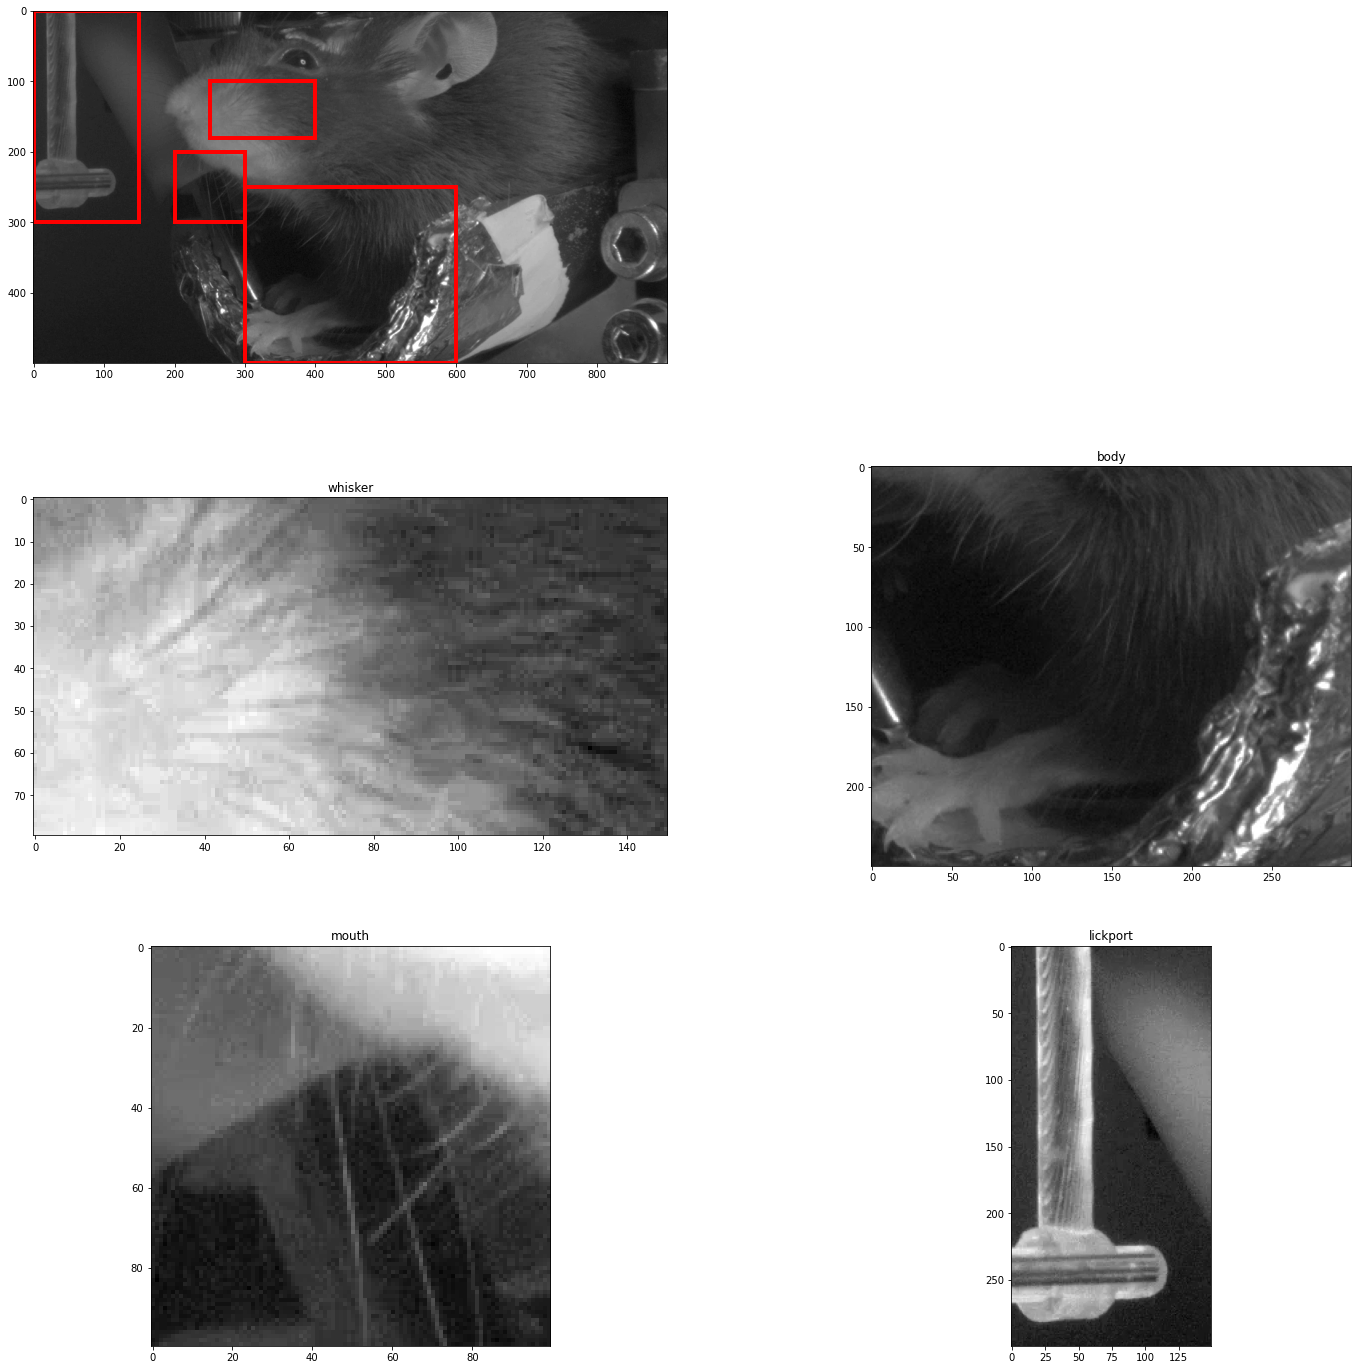